In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn import metrics

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('../Datasets/REGN_processed.csv')
df1 = df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [5]:
def build_and_train_model(X_train, y_train):
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(time_step, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)
    return model

In [6]:
def predict_future(model, last_data, n_future, n_steps=100):
    temp_input = list(last_data)
    temp_input = temp_input[0].tolist()
    
    lst_output = []
    i = 0
    while i < n_future:
        if len(temp_input) > n_steps:
            x_input = np.array(temp_input[1:])
            x_input = x_input.reshape(1, -1)
            x_input = x_input.reshape((1, n_steps, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, n_steps, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
            
    return np.array(lst_output).reshape(-1, 1) 

In [7]:
def plot_predictions(df1, scaler, train_data, test_data, y_pred, lst_output, train_size, test_size, title):
    train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
    plt.plot(train_data_index, scaler.inverse_transform(train_data))

    test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
    plt.plot(test_data_index, scaler.inverse_transform(test_data))

    test_pred_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
    plt.plot(test_pred_index,scaler.inverse_transform(y_pred))

    prediect_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
    plt.plot(prediect_data_index_30, scaler.inverse_transform(lst_output[:30]))

    prediect_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
    plt.plot(prediect_data_index_60, scaler.inverse_transform(lst_output[30:60]))

    prediect_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
    plt.plot(prediect_data_index_90, scaler.inverse_transform(lst_output[60:90]))

    plt.legend(['Train', 'Test', 'Predict', 'Predict30days', 'Predict60days', 'Predict90days'])
    plt.title(title)
    plt.show()


In [8]:
def evaluate_model(y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mape = metrics.mean_absolute_percentage_error(y_test, y_pred)*100
    return mae, rmse, mape

In [9]:
ratios = [0.7, 0.8, 0.6]
time_step = 100

# Results dictionary to store evaluation metrics for each ratio
results = {}

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0097
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0017
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0011
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 7.7536e-04
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.9131e-04
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 6.3718e-04
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.8489e-04
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.3487e-04
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.1423e-04
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.6582e-04
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.6798e-04
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.6073e-04
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.5729e-04
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.9035e-04
Epoch 15/100


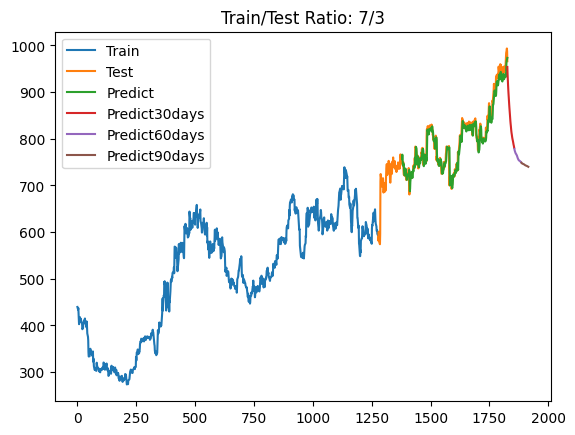

Epoch 1/100


c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0159
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.5828e-04
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.3439e-04
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 6.3105e-04
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 6.6511e-04
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 5.7259e-04
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.2058e-04
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 5.2796e-04
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.8821e-04
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 4.8707e-04
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 4.2459e-04
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.4349e-04
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.0465e-04
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.1021e-04
Epoch 15/100
22/2

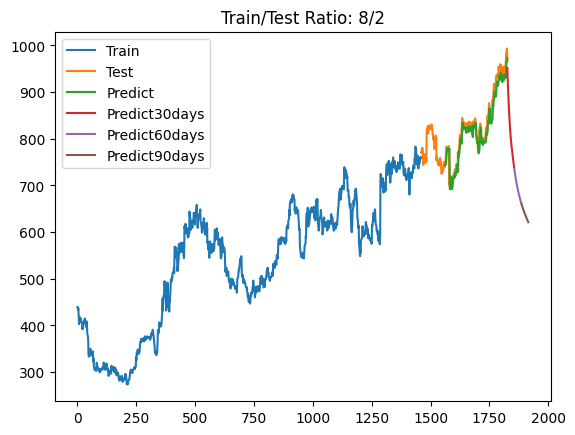

Epoch 1/100


c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0067
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.9829e-04
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.9992e-04
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2320e-04
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.2074e-04
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.7526e-04
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.9851e-04
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.0064e-04
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9949e-04
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6379e-04
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.7165e-04
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.4395e-04
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.0066e-04
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 3.5207e-04
Epoch 15/100
16/16 

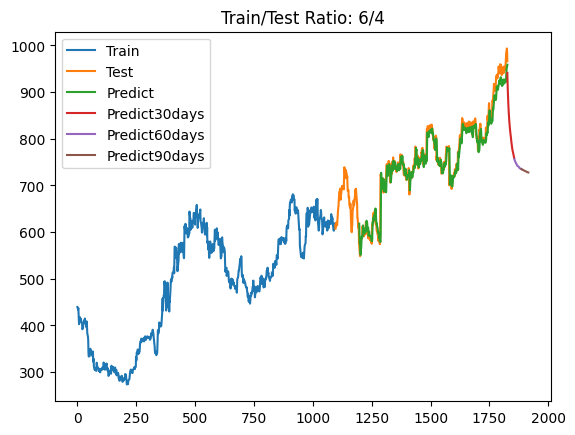

Ratio 7/3: MAE = 8.297179478236602, RMSE = 11.625544271118052, MAPE = 1.0149904431798435
Ratio 8/2: MAE = 11.2112985885908, RMSE = 13.892669774970889, MAPE = 1.3236864470830962
Ratio 6/4: MAE = 10.6102168860057, RMSE = 14.710974329324708, MAPE = 1.3627798540661904


In [10]:
for ratio in ratios:
    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    training_size = int(len(df1) * ratio)
    test_size = len(df1) - training_size
    train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

    # Tạo tập huấn luyện và kiểm tra
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Xây dựng và huấn luyện mô hình
    model = build_and_train_model(X_train, y_train)

    # Dự đoán
    y_pred = model.predict(X_test)

    # Đảo ngược quá trình chuẩn hóa
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Đánh giá mô hình
    mae, rmse, mape = evaluate_model(y_test_inv, y_pred_inv)
    results[f'Ratio {int(ratio*10)}/{10-int(ratio*10)}'] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

    # Dự đoán các giá trị trong tương lai
    last_data = test_data[-time_step:].reshape(1, -1)
    lst_output = predict_future(model, last_data, 90)

    # Vẽ biểu đồ
    plot_predictions(df1, scaler, train_data, test_data, y_pred, lst_output, training_size, test_size, f"Train/Test Ratio: {int(ratio*10)}/{10-int(ratio*10)}")

# In kết quả đánh giá
for ratio, metrics in results.items():
    print(f'{ratio}: MAE = {metrics["MAE"]}, RMSE = {metrics["RMSE"]}, MAPE = {metrics["MAPE"]}')